# Get score on new pipeline

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dyslexia import preprocessing
from dyslexia.io import load_image
from dyslexia.ocr import extract_text_from_image
from dyslexia.plots import plot_image, plot_n_images

import time
import gc

import cv2
import numpy as np
import matplotlib.pyplot as plt
import jiwer
import pandas as pd
import pickle

In [3]:
%env TESSDATA_PREFIX /usr/share/tesseract-ocr/4.00/tessdata/

env: TESSDATA_PREFIX=/usr/share/tesseract-ocr/4.00/tessdata/


## Get files


In [4]:
from utils import load_all_files_path

subdir_paths, all_files = load_all_files_path()

## Create preprocess function

This is a working section so it will changes while working on this notebook

In [8]:
def preprocess_image(image):    
    image_no_shadow = preprocessing.remove_shadow(image)
    
    image_gray = preprocessing.image_to_gray(image_no_shadow, threshold=True)

    angle = preprocessing.find_best_rotation_angle(image_gray)

    image_fixed = preprocessing.rotate_img(image_gray, angle=angle)
    
    return image_fixed

from dyslexia.preprocessing.pipeline import preprocess_image
from dyslexia.preprocessing.pipeline import pipeline

In [15]:
def get_scores_from_files(files, truth_path):
    compare_df = list()    

    with open(truth_path, 'r') as f:
        truth = f.read()

    for file in files:
        print(file)
        try:
            txt, _ = pipeline(file)
        except:
            txt = ''
            
        res0 = '\n\n'.join(txt)
        
        score0 = dict(jiwer.compute_measures(truth=truth, hypothesis=res0))
        
        
        score_idx = np.argmax([score0['hits']])
        score = [score0][score_idx]
        
        print([res0][score_idx])
        
        score = pd.Series(score).to_frame().T
        score.index = [file]
        display(score)

        compare_df.append(score)
        gc.collect()
        
    compare_df = pd.concat(compare_df)
    
    return compare_df

## Score "Dictée" files

In [16]:
dictee_files = [f for f in all_files if 'Dictee' in f]

In [17]:
dictee_truth_path = '../Exemples/truth/dictee.txt'

compare_df = get_scores_from_files(dictee_files, dictee_truth_path)

../Exemples/Dictee/IMG_20210329_122324.jpg
Dictée: Le petit chaperon rouge 

La grand-mère du petit chaperon rouge était très malade. Elle demanda à sa petite-fille, avec qui elle vivait, de lui apporter quelque chose pour la guérir. Elle l'avertit, | cependant, de faire attention au Grand Méchant Loup qui rodait dans les bois. Le loup faisait 

peur aux villageois des alentours depuis des années. Jusqu'à présent, aucun des chasseurs n'avait réussi à l’abattre. 

Le petit chaperon rouge se mit donc en route pour aider sa grand-mère. Elle redressa son 

capuchon et le plaça sur sa tête. Elle s'engouffra dans les bois rapidement. C’est là qu'elle entendit un bruit. Elle se retourna mais ne vit rien. 

Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d’approcher. Le petit chaperon rouge remarqua qu'’elle avait de grandes dents et de grandes oreilles. Sa voix était bien plus grave. Elle se rendit alors compte que ce n’était pas sa grand-mère mais bien le loup 

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.162162,0.152284,0.234765,0.765235,167.0,18.0,0.0,12.0


../Exemples/Dictee/IMG_20210329_122825.jpg



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122825.jpg,1.0,1.0,1.0,0.0,0.0,0.0,185.0,0.0


../Exemples/Dictee/IMG_20210329_122839.jpg
® 

à 

L e S SS SS 

Dictée: Le petit chaperon rouge 

La grand-mère du petit chaperon rouge était très malade. Elle demanda à sa petite-fille, avec qui elle vivait, de lui apporter quelque chose pour la guérir. Elle l'avertit, cependant, de faire attention au Grand Méchant Loup qui rodait dans les bois. Le loup faisait peur aux villageois des alentours depuis des années. Jusqu'à présent, aucun des chasseurs 

n'avait réussi à l'abattre. 

Le petit chaperon rouge se mit donc en route pour aider sa grand-mère. Elle redressa son capuchon et le plaça sur sa tête. Elle s'engouffra dans les bois rapidement. C’est là qu'elie entendit un bruit. Elle se retourna mais ne vit rien. 

Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d'approcher. Le petit chaperon rouge remarqua qu'elle avait de grandes dents et de grandes oreilles. Sa voix était bien plus grave. Elle se rendit alors compte que ce n'était pas sa grand-mère m

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122839.jpg,0.172973,0.157635,0.221382,0.778618,171.0,14.0,0.0,18.0


../Exemples/Dictee/IMG_20210329_122828.jpg
Dictée: Le petit chaperon rouge 

La grand-mère du petit chaperon rouge était très malade. Elle demanda à sa petite-fille, avec qui elle vivait, de lui apporter quelque chose pour la guérir. Elle l'avertit, cependant, de faire attention au Grand Méchant Loup qui rodait dans les bois. Le loup faisait peur aux villageois des alentours depuis des années. Jusqu’à présent, aucun des chasseurs n’avait réussi à l’abattre. 

Le petit chaperon rouge se mit donc en route pour aider sa grand-mère. Elle redressa son capuchon et le plaça sur sa tête. Elle s'engouffra dans les bois rapidement. C’est là qu’elle entendit un bruit. Elle se retourna mais ne vit rien. 

Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d’approcher. Le petit chaperon rouge remarqua qu’elle avait de grandes dents et de grandes oreilles. Sa voix était bien plus grave. Elle se rendit alors compte que ce n’était pas sa grand-mère mais bien le loup qui s’é

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122828.jpg,0.162162,0.153061,0.240044,0.759956,166.0,19.0,0.0,11.0


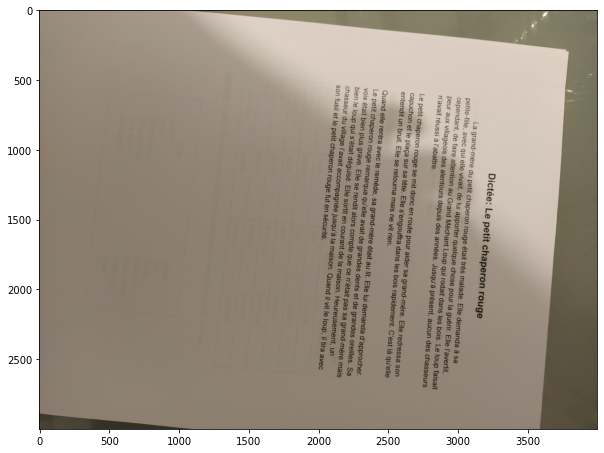

In [22]:
p = '../Exemples/Dictee/IMG_20210329_122828.jpg'
im = load_image(p)
plot_image(im)

In [19]:
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.162162,0.152284,0.234765,0.765235,167.0,18.0,0.0,12.0
../Exemples/Dictee/IMG_20210329_122825.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Dictee/IMG_20210329_122839.jpg,0.172973,0.157635,0.221382,0.778618,171.0,14.0,0.0,18.0
../Exemples/Dictee/IMG_20210329_122828.jpg,0.162162,0.153061,0.240044,0.759956,166.0,19.0,0.0,11.0


Score without preprocessing

In [21]:
fpath_dictee_score = '../Exemples/scores/score_dictee.pkl'

with open(fpath_dictee_score, 'rb') as f:
    compare_df_orig = pickle.load(f)
    
compare_df_orig

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.059459,0.059459,0.115383,0.884617,174.0,11.0,0.0,0.0
../Exemples/Dictee/IMG_20210329_122825.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Dictee/IMG_20210329_122839.jpg,0.540541,0.537634,0.622845,0.377155,86.0,19.0,80.0,1.0
../Exemples/Dictee/IMG_20210329_122828.jpg,0.951351,0.951351,0.981757,0.018243,9.0,15.0,161.0,0.0


## Score "Hist geo" files

In [23]:
hist_geo_files = [f for f in all_files if 'Histoire_Geo' in f]

hist_geo_truth_path = '../Exemples/truth/hist_geo.txt'
fpath_hist_geo_score = '../Exemples/scores/score_hist_geo.pkl'

In [24]:
with open(hist_geo_truth_path, 'r') as f:
    truth_geo = f.read()
    
print(truth_geo)

La Grèce Antique

I. Le théâtre grec

Les pièces de théâtre grecque étaient très appréciées dans l'Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaients les représentations, avaient une
forme particulière en demi-cercle: ce sont les amphithéâtres.

Gradins

Scène
Organisation d'un amphithéâtre


II. La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.


In [25]:
compare_df = get_scores_from_files(hist_geo_files, dictee_truth_path)

../Exemples/Histoire_Geo/IMG_20210329_122543.jpg
—. 

La Grèce Antique | _ Le théâtre grec Les pièces de théâ ; théâtre grecque étaient très appréciées dans l’Antiquité. Les 

Grecs des Tem i ps Anci éciai ! épopées des héros Leesns îlîpfec;3.ent tout particulièrement les tragédies et le récit des . théâtres, où se déroulaient les représentations, avaient une 9 

f e * e . orme particulière en demi-cercle: ce sont les amphithéâtres 

/ Organisation d'un amphithéâtre 

I  La société grecque 

inventé la démocratie. Chacun est citoyen à partir de sa majorité et 

Les grecs ont r la façon de diriger \a cité. 

N REULS valoir son opinion su 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.940541,0.940541,0.993588,0.006412,11.0,91.0,83.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_123005.jpg
La Grèce Antique 

E dal-Toide-Relg- e 

Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une 

forme particulière en demi-cercle: ce sont les amphithéâtres. 

] } 

K' L—‘——————°——————-———J Organisation d'un amphithéâtre 

I. — La société grecque 

Les grecs ont inventé la démocratie. Chacun est cito ' [; I _ . — yen à partir de sa ma peut faire valoir son opinion sur la façon de diriger la cité. ° jorité et 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.935135,0.935135,0.992057,0.007943,12.0,86.0,87.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122940.jpg



,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.0,1.0,1.0,0.0,0.0,0.0,185.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_123000.jpg
rc en r S en ON 

La Grèce Antique 

| — Lethéâtre grec Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une 

forme particulière en demi-cercle: ce sont les amphithéâtres. 

) Organisation d’un amphithéâtre 

IL _ Lasociété grecque Les grecs ont inventé la démocratie. Chacun est cito ‘ iori ; | b ‘ yen à partir de sa maiorité peut faire valoir son opinion sur la façon de diriger la cité. | ° 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.945946,0.945946,0.994595,0.005405,10.0,90.0,85.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122932.jpg
La Grèce Antique 

| Le théâtre grec Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les 

Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une 

forme particulière en demi-cercle: ce sont les ithéâcres. Gradins L _J / Organisation d'un amphithéâtre 

. — La société grecque 

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et peut faire valoir son opinion sur la façon de diriger la cité. 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.940541,0.940541,0.992733,0.007267,11.0,79.0,95.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122524.jpg
! 3 Grèce Antique 

, — étaient très appréciées dans l’Antiquité. Les : 3:,, « : IMN tout particulièrement les tragédies et le récit des - &es théâtres, où se déroulaient les représentations, avaient une 

-<--»-—"## €n demi-cercle: ce sont les amphithéâtres. 

Organisation d'un amphithéâtre 

L _ Lasociété grecque 

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et peut faire valoir son opinion sur la façon de diriger la cité. 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.951351,0.951351,0.994239,0.005761,9.0,67.0,109.0,0.0


../Exemples/Histoire_Geo/IMG_20210329_122536.jpg
La Grèce Antique | _ Le théâtre grec 

Les pièces de théâtre grecque étaient très appréciées dans l’Antiquité. Les Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des épopées des héros. Les théâtres, où se déroulaient les représentations, avaient une 

forme particulière en demi-cercle: ce sont les amphithéâtres. 

r 

) Organisation d’un amphithéâtre 

. — La société grecque 

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et peut faire valoir son opinion sur la façon de diriger la cité. 


,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.940541,0.940541,0.992651,0.007349,11.0,78.0,96.0,0.0


In [26]:
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.940541,0.940541,0.993588,0.006412,11.0,91.0,83.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.935135,0.935135,0.992057,0.007943,12.0,86.0,87.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.945946,0.945946,0.994595,0.005405,10.0,90.0,85.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.940541,0.940541,0.992733,0.007267,11.0,79.0,95.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.951351,0.951351,0.994239,0.005761,9.0,67.0,109.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.940541,0.940541,0.992651,0.007349,11.0,78.0,96.0,0.0


In [27]:
with open(fpath_hist_geo_score, 'rb') as f:
    compare_df_orig = pickle.load(f)
    
compare_df_orig

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.536585,0.530120,0.596766,0.403234,39.0,6.0,37.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.402439,0.397590,0.491870,0.508130,50.0,9.0,23.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,82.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.304878,0.260417,0.352888,0.647112,71.0,10.0,1.0,14.0
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.158537,0.151163,0.235438,0.764562,73.0,8.0,1.0,4.0
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.365854,0.357143,0.538169,0.461831,54.0,21.0,7.0,2.0
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.390244,0.344086,0.478413,0.521587,61.0,15.0,6.0,11.0
